# ROB6323: Reinforcement learning and optimal control for robotics
# Exercise series 1 : code solutions 
# Shantanu Ghodgaonkar | sng8399

In [14]:
# Dependency Resolution

import sys
import subprocess

# Function to install packages
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of required packages
required_packages = ["scipy", "sympy", "matplotlib", "qpsolvers[clarabel]"]

# Check and install each package
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        print(f"{package} not found. Installing...")
        install(package)

qpsolvers[clarabel] not found. Installing...
Defaulting to user installation because normal site-packages is not writeable


In [15]:
# Importing necessary modules

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.optimize import minimize
import sympy as sp
from qpsolvers import solve_qp

## Exercise 1 
The below blocks plot and find the minimum values of each of the functions assigned in Exercise 1 of the Series 1 of Homework.
### 1(a): $f_1(x) = -e^{-(x-1)^2}, \text{ where } x \in \mathbb{R}$



Using scipy.optimize.minimize : Minimum value of the function f1 was found to be -1.0 at x = 0.9999999952521768




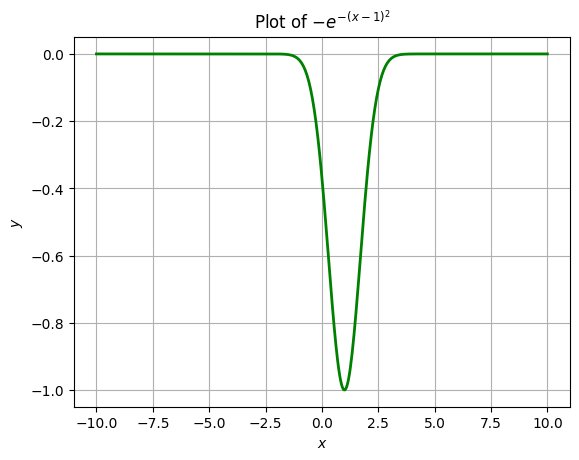

In [16]:
lim = 10
REAL_NUMS = np.linspace(-lim, lim, 500)

def f1(x) : return -np.exp(-((x - 1)**2))
res = minimize(f1, x0=0)

print(f"\n\nUsing scipy.optimize.minimize : Minimum value of the function f1 was found to be {res.fun} at x = {res.x[0]}\n\n")
y = [f1(x) for x in REAL_NUMS]
# Plot with customization
plt.plot(REAL_NUMS, y, color='green',
         linestyle='-', linewidth=2)

# Add labels, grid, legend, and title
plt.title(r'Plot of $-e^{-(x-1)^2}$')  # Title with LaTeX
plt.xlabel(r'$x$')               # X-axis label with LaTeX
plt.ylabel(r'$y$')          # Y-axis label with LaTeX
plt.grid(True)
# Show the plot
plt.savefig('plots/ex1/ex1aPlot.png')
plt.show()

### 1(b): $f_2(x) = (1 - x)^2 + 100(y - x^2)^2, \text{ where } x, y \in \mathbb{R}$



Using scipy.optimize.minimize : Minimum value of the function f2 was found to be 0.0 at x = [0.99999 0.99999]




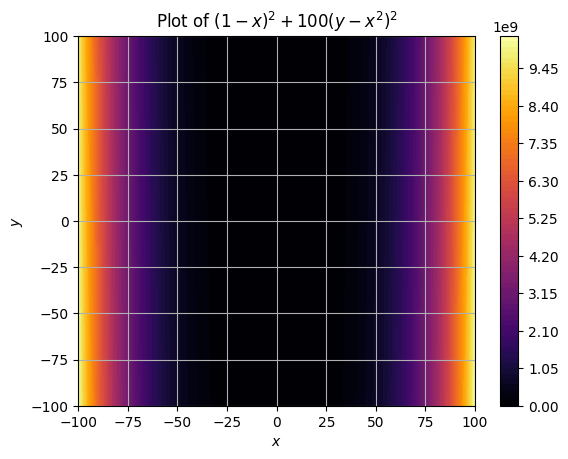

In [24]:
lim = 100
REAL_NUMS = np.linspace(-lim, lim, 500)

def f2(x): return ((1-x[0])**2) + (100 * ((x[1] - (x[0]**2))**2))
res = minimize(f2, x0=[0,0])

print(f"\n\nUsing scipy.optimize.minimize : Minimum value of the function f2 was found to be {round(res.fun, 5)} at x = {np.round(res.x, 5)}\n\n")
x = np.meshgrid(REAL_NUMS, REAL_NUMS)
y = f2(x)
# Create a contour plot
plt.figure()

# Create filled contours
plt.contourf(x[0], x[1], y, levels=100, cmap='inferno')

# Add a color bar to indicate the values of the contours
plt.colorbar()

# Add labels, grid, legend, and title
plt.title(r'Plot of $(1 - x)^2 + 100(y - x^2)^2$')  # Title with LaTeX
plt.xlabel(r'$x$')               # X-axis label with LaTeXdark mode
plt.ylabel(r'$y$')          # Y-axis label with LaTeX
plt.grid(True)
plt.savefig('plots/ex1/ex1bPlot.png')
# Show the plot
plt.show()

### 1(c): $f_3(x) = 20x + 2x^2 + 4y - 2y^2, \text{ where } x, y \in \mathbb{R}$



Using QP Solvers : Minimum value of the function f3 was found to be -48.0 at x = [-5.  1.]


Using scipy.optimize.minimize : Minimum value of the function f3 was found to be -29945731.791552752 at x = [ 7724.54299098 -8642.99657249]




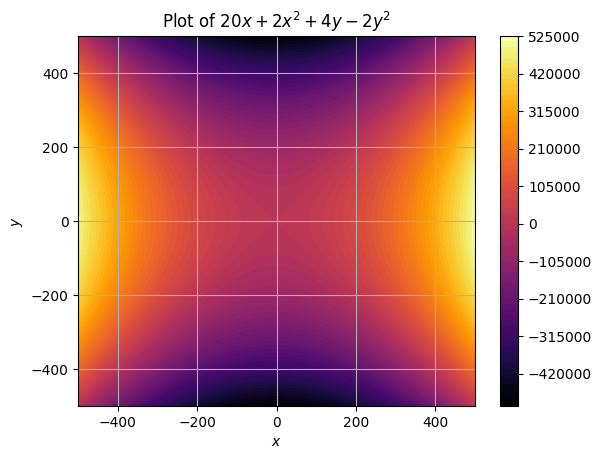

In [18]:
lim = 500
REAL_NUMS = np.linspace(-lim, lim, 500)

def f3(x): return (20 * x[0]) + (2 * (x[0] ** 2)) + (4 * x[1]) - (2 * (x[1] ** 2))

P = np.array(([[2, 0], [0, -2]]))
q = np.array(([[10, 2]])).T
res = solve_qp(P=P, q=q, solver='clarabel')

print(f"\n\nUsing QP Solvers : Minimum value of the function f3 was found to be {f3(res)} at x = {res}")
res = minimize(f3, x0=[-lim,-lim])
print(f"\n\nUsing scipy.optimize.minimize : Minimum value of the function f3 was found to be {res.fun} at x = {res.x}\n\n")

x = np.meshgrid(REAL_NUMS, REAL_NUMS)
y = f3(x)
# Create a contour plot
plt.figure()

# Create filled contours
plt.contourf(x[0], x[1], y, levels=100, cmap='inferno')

# Add a color bar to indicate the values of the contours
plt.colorbar()

# Add labels, grid, legend, and title
plt.title(r'Plot of $20x + 2x^2 + 4y - 2y^2$')  # Title with LaTeX
plt.xlabel(r'$x$')               # X-axis label with LaTeX
plt.ylabel(r'$y$')          # Y-axis label with LaTeX
plt.grid(True)
plt.savefig('plots/ex1/ex1cPlot.png')
# Show the plot
plt.show()




### 1(d): $f_4(x) = x^T \begin{bmatrix} 3 & 1 \\ 1 & 3 \end{bmatrix} x + \begin{bmatrix} -1 & 1 \end{bmatrix} x, \text{ where } x \in \mathbb{R}^2$

/home/shantanu/.local/lib/python3.10/site-packages/qpsolvers/conversions/ensure_sparse_matrices.py:24: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(




Using QP Solvers : Minimum value of the function f4 was found to be -0.25 at x = [ 0.25 -0.25]


Using scipy.optimize.minimize : Minimum value of the function f4 was found to be -0.249999999999999 at x = [ 0.24999999 -0.25000001]




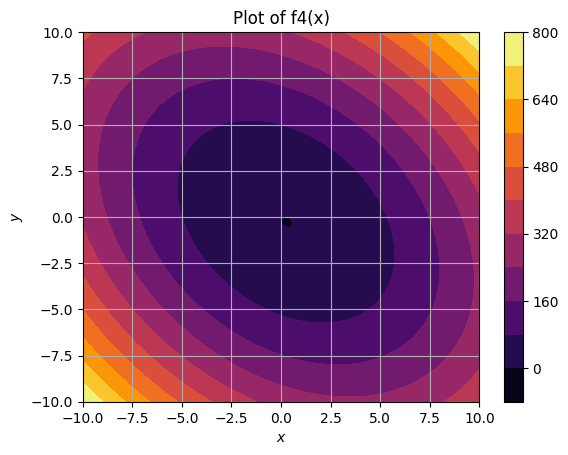

In [19]:
lim = 10
REAL_NUMS = np.linspace(-lim, lim, 500)

def f4(x): return (3 * (x[0]**2)) + (2 * x[0] * x[1]) + (3 * (x[1]**2)) - x[0] + x[1]

P = np.array(([[3, 1], [1, 3]]))
q = np.array(([[-0.5, 0.5]])).T
res = solve_qp(P=P, q=q, solver='clarabel')

print(f"\n\nUsing QP Solvers : Minimum value of the function f4 was found to be {f4(res)} at x = {res}")

res = minimize(f4, x0=[0,0])
print(f"\n\nUsing scipy.optimize.minimize : Minimum value of the function f4 was found to be {res.fun} at x = {res.x}\n\n")


    
x = np.meshgrid(REAL_NUMS, REAL_NUMS)
y = f4(x)
# Create a contour plot
plt.figure()

# Create filled contours
plt.contourf(x[0], x[1], y, levels=10, cmap='inferno')

# Add a color bar to indicate the values of the contours
plt.colorbar()

# Add labels, grid, legend, and title
plt.title(r'Plot of f4(x)')  # Title with LaTeX
plt.xlabel(r'$x$')               # X-axis label with LaTeX
plt.ylabel(r'$y$')          # Y-axis label with LaTeX
plt.grid(True)
plt.savefig('plots/ex1/ex1dPlot.png')
# Show the plot
plt.show()


### 1(e): $f_5(x) = x^T \begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix} x + \begin{bmatrix} 1 & 10 \end{bmatrix} x, \text{ where } x \in \mathbb{R}^2$



Using QP Solvers : Minimum value of the function f1 was found to be 3.552713678800501e-15 at x = [-6.33333333  2.66666667]


Using scipy.optimize.minimize : Minimum value of the function f5 was found to be -2891042.6801139354 at x = [  978.5076364  -1964.37079151]




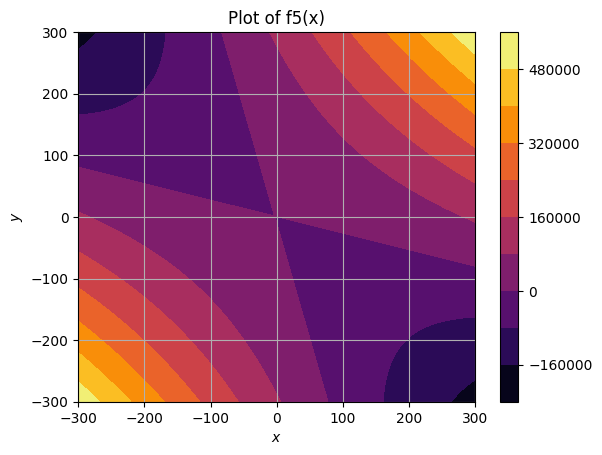

In [20]:
lim = 300
REAL_NUMS = np.linspace(-lim, lim, 500)

P = np.array(([[1, 2], [2, 1]]))
q = np.array(([[1, 10]])).T
res = solve_qp(P=P, q=q, solver='clarabel')
def f5(x): return x[0] * (1 * x[0] + 2 * x[1]) + x[1] * (2 * x[0] + 1 * x[1]) + 1 * x[0] + 10 * x[1]

print(f"\n\nUsing QP Solvers : Minimum value of the function f1 was found to be {f5(res)} at x = {res}")
res = minimize(f5, x0=[0,0])
print(f"\n\nUsing scipy.optimize.minimize : Minimum value of the function f5 was found to be {res.fun} at x = {res.x}\n\n")

x = np.meshgrid(REAL_NUMS, REAL_NUMS)
y = f5(x)
# Create a contour plot
plt.figure()

# Create filled contours
plt.contourf(x[0], x[1], y, levels=10, cmap='inferno')

# Add a color bar to indicate the values of the contours
plt.colorbar()

# Add labels, grid, legend, and title
plt.title(r'Plot of f5(x)')  # Title with LaTeX
plt.xlabel(r'$x$')               # X-axis label with LaTeX
plt.ylabel(r'$y$')          # Y-axis label with LaTeX
plt.grid(True)
plt.savefig('plots/ex1/ex1ePlot.png')
# Show the plot
plt.show()


### 1(f): $f_6(x) = \frac{1}{2} x^T \begin{bmatrix}1 & 1 & 0 \\ 1 & 1 & 0 \\ 0 & 0 & 4  \end{bmatrix}  x - \begin{bmatrix} 0 & 0 & 1  \end{bmatrix} x, \text{ where } x \in \mathbb{R}^3$

/home/shantanu/.local/lib/python3.10/site-packages/qpsolvers/conversions/ensure_sparse_matrices.py:24: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(




Using QP Solvers : Minimum value of the function f6 was found to be -0.125 at x = [0.   0.   0.25]


Using scipy.optimize.minimize : Minimum value of the function f6 was found to be -0.12499999999999999 at x = [-1.86264519e-09 -1.86264519e-09  2.49999999e-01]




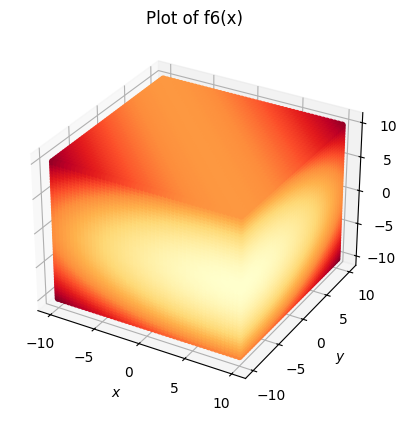

In [21]:
lim = 10
REAL_NUMS = np.linspace(-lim, lim, 50)

P = np.array(([[1, 1, 0], [1, 1, 0], [0, 0, 4]]))
q = np.array(([[0, 0, -1]])).T
res = solve_qp(P=P, q=q, solver='clarabel')


def f6(x): return 0.5 * (x[0] * (1 * x[0] + 1 * x[1]) + x[1] * (1 * x[0] + 1 * x[1]) + x[2] * (4 * x[2])) - (0 * x[0] + 0 * x[1] + 1 * x[2])

print(f"\n\nUsing QP Solvers : Minimum value of the function f6 was found to be {f6(res)} at x = {res}")
res = minimize(f6, x0=[0,0,0])
print(f"\n\nUsing scipy.optimize.minimize : Minimum value of the function f6 was found to be {res.fun} at x = {res.x}\n\n")

    
x = np.meshgrid(REAL_NUMS, REAL_NUMS, REAL_NUMS)
y = f6(x)
# Create a contour plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create filled contours
img = ax.scatter(x[0], x[1], x[2], c=y, cmap='YlOrRd', alpha=1)

# # Add a color bar to indicate the values of the contours
# plt.colorbar()

# # Add labels, grid, legend, and title
ax.set_title(r'Plot of f6(x)')  # Title with LaTeX
ax.set_xlabel(r'$x$')               # X-axis label with LaTeX
ax.set_ylabel(r'$y$')          # Y-axis label with LaTeX
ax.set_zlabel(r'$z$')          # Z-axis label with LaTeX
plt.grid(True)
plt.savefig('plots/ex1/ex1fPlot.png')
# Show the plot
plt.show()


## Exercise 2
Given below is the python code that was used to perform the computation of the solution for this exercise

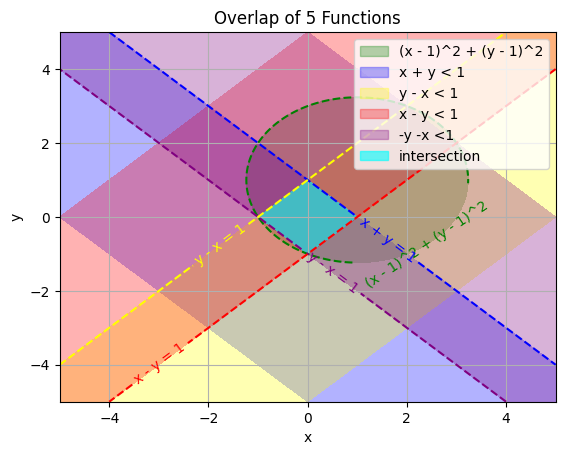



QP solution: x = array([0.5, 0.5])


h1(x*, y*) = -0.0
h2(x*, y*) = -1.0
h3(x*, y*) = -1.0
h4(x*, y*) = -2.0


Estimated Lagrange multipliers: mu1 = non-zero, mu2 = 0, mu3 = 0, mu4 = 0


/home/shantanu/.local/lib/python3.10/site-packages/qpsolvers/conversions/ensure_sparse_matrices.py:24: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


In [22]:
lim = 5
REAL_NUMS = np.linspace(-lim, lim, 500)

# ---------- This part is responsible for the Contour Plot of the given Function ----------
x = np.meshgrid(REAL_NUMS, REAL_NUMS)
f = (((x[0] - 1)**2) + ((x[1] - 1)**2))
h1 = x[0] + x[1]
h2 = x[1] - x[0]
h3 = x[0] - x[1]
h4 = -x[1] - x[0]

intersection = np.logical_and.reduce((h1 < 1, h2 < 1, h3 < 1, h4 < 1))
# Create a 3D plot
fig = plt.figure()

# Filled contour plots for each function
plt.contourf(x[0], x[1], f, levels=[-lim, lim],
             colors=['green'], alpha=0.3)
plt.contourf(x[0], x[1], h1, levels=[-lim, 1],
             colors=['blue'], alpha=0.3)
plt.contourf(x[0], x[1], h2, levels=[-lim, 1],
             colors=['yellow'], alpha=0.3)
plt.contourf(x[0], x[1], h3, levels=[-lim, 1],
             colors=['red'], alpha=0.3)
plt.contourf(x[0], x[1], h4, levels=[-lim, 1],
             colors=['purple'], alpha=0.3)
plt.contourf(x[0], x[1], intersection, levels=[0.5, 1],
             colors=['cyan'], alpha=0.6)

# Add contour lines for labeling
cont_f = plt.contour(x[0], x[1], f, levels=[5],
                     colors='green', linestyles='--')
cont_h1 = plt.contour(x[0], x[1], h1, levels=[1],
                      colors='blue', linestyles='--')
cont_h2 = plt.contour(x[0], x[1], h2, levels=[1],
                      colors='yellow', linestyles='--')
cont_h3 = plt.contour(x[0], x[1], h3, levels=[1],
                      colors='red', linestyles='--')
cont_h4 = plt.contour(x[0], x[1], h4, levels=[1],
                      colors='purple', linestyles='--')

# Label the contours with the function names directly on the plot
plt.clabel(cont_f, inline=True, fontsize=10, fmt={
           cont_f.levels[0]: r'(x - 1)^2 + (y - 1)^2'})
plt.clabel(cont_h1, inline=True, fontsize=10,
           fmt={cont_h1.levels[0]: r'x + y = 1'})
plt.clabel(cont_h2, inline=True, fontsize=10,
           fmt={cont_h2.levels[0]: r'y - x = 1'})
plt.clabel(cont_h3, inline=True, fontsize=10,
           fmt={cont_h3.levels[0]: r'x - y = 1'})
plt.clabel(cont_h4, inline=True, fontsize=10,
           fmt={cont_h4.levels[0]: r'-y - x = 1'})

# Step 4: Customize the plot
# plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Overlap of 5 Functions')
# plt.colorbar()
plt.grid(True)

# Step 5: Create custom legend handles
green_patch = mpatches.Patch(
    color='green', alpha=0.3, label=r'(x - 1)^2 + (y - 1)^2')
blue_patch = mpatches.Patch(
    color='blue', alpha=0.3, label=r'x + y < 1')
yellow_patch = mpatches.Patch(
    color='yellow', alpha=0.3, label=r'y - x < 1')
red_patch = mpatches.Patch(
    color='red', alpha=0.3, label=r'x - y < 1')
purple_patch = mpatches.Patch(
    color='purple', alpha=0.3, label=r'-y -x <1')
cyan_patch = mpatches.Patch(
    color='cyan', alpha=0.6, label=r'intersection')

# Step 6: Add the legend to the plot
plt.legend(handles=[green_patch, blue_patch,
           yellow_patch, red_patch, purple_patch, cyan_patch])
# plt.savefig('plots/ex2/ex2bPlot_raw.png')
# Show the plot
plt.show()

# ---------- This part is responsible for the Minimization of the given Function ----------
# Quadratic term matrix (P)
P = np.array([[2, 0],
              [0, 2]])

# Linear term vector (q) reshaped as a column vector
q = np.array([-2, -2])

# Constraint matrix (G) and RHS vector (h)
G = np.array([[1, 1],
              [-1, 1],
              [1, -1],
              [-1, -1]])
h = np.array([1, 1, 1, 1])

# Solve the QP problem using qpsolver
x = solve_qp(P=P, q=q, G=G, h=h, solver="clarabel")
print(f"\n\nQP solution: {x = }\n\n")

# Check the values of the constraints at the optimal solution
h1 = round((x[0] + x[1] - 1), 5)
h2 = round((x[1] - x[0] - 1), 5)
h3 = round((x[0] - x[1] - 1), 5)
h4 = round((-x[0] - x[1] - 1), 5)

print(f"h1(x*, y*) = {h1}")
print(f"h2(x*, y*) = {h2}")
print(f"h3(x*, y*) = {h3}")
print(f"h4(x*, y*) = {h4}")

# Use complementary slackness to determine mu values
mu_1 = 0 if h1 < 0 else "non-zero"
mu_2 = 0 if h2 < 0 else "non-zero"
mu_3 = 0 if h3 < 0 else "non-zero"
mu_4 = 0 if h4 < 0 else "non-zero"

print(
    f"\n\nEstimated Lagrange multipliers: mu1 = {mu_1}, mu2 = {mu_2}, mu3 = {mu_3}, mu4 = {mu_4}")

## Exercise 3
Given below is the python code that was used to perform the computation of the solution for this exercise

In [23]:
# Quadratic term matrix (Q)
Q = np.array([[100, 2, 1], [2, 10, 3], [1, 3, 1]])

# Constraint matrix (A) and RHS vector (b)
A = np.ones((1, 3))
b = np.array([1])

# Stacking the LHS matrices
lhs_a = np.vstack((np.hstack((Q, A.T)), np.hstack((A, [[0]]))))

# stacking the RHS matrices
rhs_b = np.vstack((np.zeros((3, 1)), [1]))

# Solve the QP problem using numpy.linalg.solve
x = np.linalg.solve(lhs_a, rhs_b)
print(f"QP solution: {x = }")

QP solution: x = array([[-0.00404858],
       [-0.40080972],
       [ 1.4048583 ],
       [-0.19838057]])
